В домашньому завданні до даного модулю ви потренуєтесь робити тестове завдання для влаштування на роботу. За даними акселерометра з мобільного телефону потрібно класифікувати, якою діяльністю займається людина: йде, стоїть, біжить чи йде по сходах. Знайти датасет ви можете за посиланням.

Використайте алгоритми **SVM** та **випадковий ліс** з бібліотеки scikit-learn. Як характеристики можете брати показники з акселерометра, проте щоб покращити результати роботи алгоритмів, спочатку можна підготувати наш датасет і розрахувати часові ознаки (time domain features). Більше ці характеристики описані в даній статті.

Порівняйте результати роботи обох алгоритмів на різних фічах та різні моделі між собою.

In [1]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.DataFrame()
df1 = pd.DataFrame()
df1_features = pd.DataFrame()
for i in range(1, 1040):
  j = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/data/idle/idle-{i}.csv")
  df1 = pd.concat([df1, j])
  k = pd.Series([j["accelerometer_X"].mean(), j["accelerometer_Y"].mean(), j["accelerometer_Z"].mean(), j["accelerometer_X"].min(), j["accelerometer_Y"].min(), j["accelerometer_Z"].min(), j["accelerometer_X"].max(),j["accelerometer_Y"].max(),j["accelerometer_Z"].max(),j["accelerometer_X"].std(),j["accelerometer_Y"].std(),j["accelerometer_Z"].std()])
  df1_features = df1_features.append(k, ignore_index=True)
df1["class"] = [1 for i in range(len(df1["accelerometer_X"]))]
df1_features["class"] = [1 for i in range(len(df1_features[0]))]
display(df1.shape)
df1.head()
display(df1_features.shape)
df1_features.head()

In [ ]:
df2 = pd.DataFrame()
df2_features = pd.DataFrame()
for i in range(1, 3049):
  j = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/data/running/running-{i}.csv")
  df2 = pd.concat([df2, j])
  k = pd.Series([j["accelerometer_X"].mean(), j["accelerometer_Y"].mean(), j["accelerometer_Z"].mean(), j["accelerometer_X"].min(), j["accelerometer_Y"].min(), j["accelerometer_Z"].min(), j["accelerometer_X"].max(),j["accelerometer_Y"].max(),j["accelerometer_Z"].max(),j["accelerometer_X"].std(),j["accelerometer_Y"].std(),j["accelerometer_Z"].std()])
  df2_features = df2_features.append(k, ignore_index=True)
df2["class"] = [2 for i in range(len(df2["accelerometer_X"]))]
df2_features["class"] = [2 for i in range(len(df2_features[0]))]
display(df2.shape)
df2.head()
display(df2_features.shape)
df2_features.head()

In [ ]:
df3 = pd.DataFrame()
df3_features = pd.DataFrame()
for i in range(1, 166):
  j = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/data/stairs/stairs-{i}.csv")
  df3 = pd.concat([df3, j])
  k = pd.Series([j["accelerometer_X"].mean(), j["accelerometer_Y"].mean(), j["accelerometer_Z"].mean(), j["accelerometer_X"].min(), j["accelerometer_Y"].min(), j["accelerometer_Z"].min(), j["accelerometer_X"].max(),j["accelerometer_Y"].max(),j["accelerometer_Z"].max(),j["accelerometer_X"].std(),j["accelerometer_Y"].std(),j["accelerometer_Z"].std()])
  df3_features = df3_features.append(k, ignore_index=True)
df3["class"] = [3 for i in range(len(df3["accelerometer_X"]))]
df3_features["class"] = [3 for i in range(len(df3_features[0]))]
display(df3.shape)
df1.head()
display(df3_features.shape)
df3_features.head()

In [ ]:
df4 = pd.DataFrame()
df4_features = pd.DataFrame()
for i in range(1, 1851):
  j = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/data/walking/walking-{i}.csv")
  df4 = pd.concat([df4, j])
  k = pd.Series([j["accelerometer_X"].mean(), j["accelerometer_Y"].mean(), j["accelerometer_Z"].mean(), j["accelerometer_X"].min(), j["accelerometer_Y"].min(), j["accelerometer_Z"].min(), j["accelerometer_X"].max(),j["accelerometer_Y"].max(),j["accelerometer_Z"].max(),j["accelerometer_X"].std(),j["accelerometer_Y"].std(),j["accelerometer_Z"].std()])
  df4_features = df4_features.append(k, ignore_index=True)
df4["class"] = [4 for i in range(len(df4["accelerometer_X"]))]
df4_features["class"] = [4 for i in range(len(df4_features[0]))]
display(df4.shape)
df1.head()
display(df4_features.shape)
df4_features.head()

In [77]:
from sklearn.utils import shuffle

df = pd.concat([df1, df2, df3, df4])
df_features = pd.concat([df1_features, df2_features, df3_features, df4_features])
df = shuffle(df).reset_index(drop=True)
df_features.columns = ["mean_X", "mean_Y", "mean_Z", "min_X", "min_Y", "min_Z", "max_X", "max_Y", "max_Z", "std_X", "std_Y", "std_Z", "class"]
df_features = shuffle(df_features).reset_index(drop=True)
df_features.head()

,mean_X,mean_Y,mean_Z,min_X,min_Y,min_Z,max_X,max_Y,max_Z,std_X,std_Y,std_Z,class
0,5.163176,7.163771,0.320025,-6.789956,-16.898275,-9.864111,24.851814,31.440657,23.937230,7.769669,13.822343,5.542443,2
1,-3.674142,-9.414001,-1.121284,-17.348385,-22.869415,-19.531897,3.289633,11.439496,18.387468,4.778117,6.737571,6.902596,4
2,-0.274695,-12.076992,-1.926375,-10.453085,-27.753586,-20.877440,8.279149,8.954314,15.054740,4.663528,7.709002,7.689879,4
3,10.214622,11.730631,-2.530511,-33.178850,-20.278889,-21.298819,39.188293,39.188293,9.351752,14.577752,17.454490,6.445158,2
4,0.250593,-0.015323,9.766428,0.143652,-0.067038,9.715671,0.359130,0.076614,9.797073,0.038827,0.029715,0.021766,1


1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     31170
           2       1.00      1.00      1.00     91440
           3       1.00      1.00      1.00      4950
           4       1.00      1.00      1.00     55500

    accuracy                           1.00    183060
   macro avg       1.00      1.00      1.00    183060
weighted avg       1.00      1.00      1.00    183060

Weights: [[ 0  0  0 -2]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0 -1]
 [ 0  0  0  0]
 [ 0  0  0 -1]]
Intercept: [3 1 1 4 2 6]


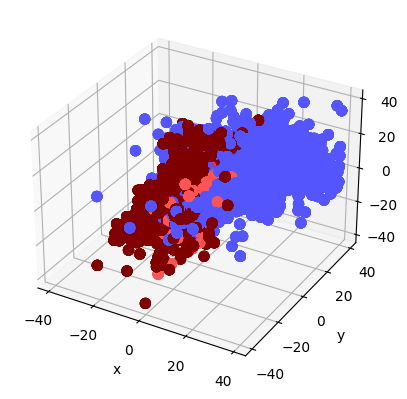

In [78]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score, classification_report


# fit the model
clf = SVC(kernel='linear', gamma=0.25, probability=True)
X = df
y = df["class"]
clf.fit(X, y)
print(clf.score(X, y))


predictions = clf.predict(X)
print(classification_report(y, predictions))

# Get w, b
print("Weights:", clf.coef_.astype(int))
print("Intercept:", clf.intercept_.astype(int))

# visualize the decision function in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(df["accelerometer_X"], df["accelerometer_Y"], df["accelerometer_Z"], c=y, s=50, cmap='seismic')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.set_title('Decision function')
plt.show()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1039
           2       1.00      1.00      1.00      3048
           3       1.00      1.00      1.00       165
           4       1.00      1.00      1.00      1850

    accuracy                           1.00      6102
   macro avg       1.00      1.00      1.00      6102
weighted avg       1.00      1.00      1.00      6102



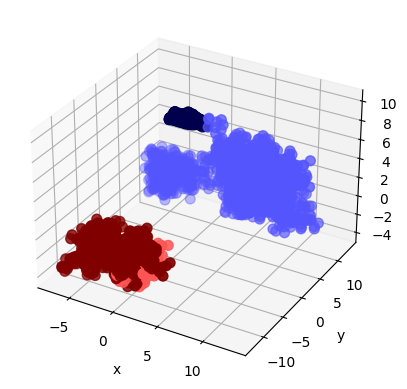

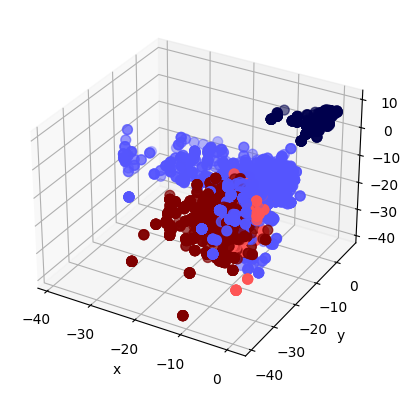

In [80]:
clf2 = SVC(kernel='rbf', gamma=1, probability=True)
X_f = df_features
y_f = df_features["class"]
clf2.fit(X_f, y_f)
# print(clf2.score(X_f, y_f))


predictions_f = clf2.predict(X_f)
print(classification_report(y_f, predictions_f))


# Get w, b
# print("Weights:", clf2.coef_.astype(int))
# print("Intercept:", clf2.intercept_.astype(int))

# visualize the decision function in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_f["mean_X"], X_f["mean_Y"], X_f["mean_Z"], c=y_f, s=50, cmap='seismic')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_f["min_X"], X_f["min_Y"], X_f["min_Z"], c=y_f, s=50, cmap='seismic')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.set_title('Decision function')
plt.show()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6198
           2       1.00      1.00      1.00     18340
           3       1.00      1.00      1.00      1002
           4       1.00      1.00      1.00     11072

    accuracy                           1.00     36612
   macro avg       1.00      1.00      1.00     36612
weighted avg       1.00      1.00      1.00     36612



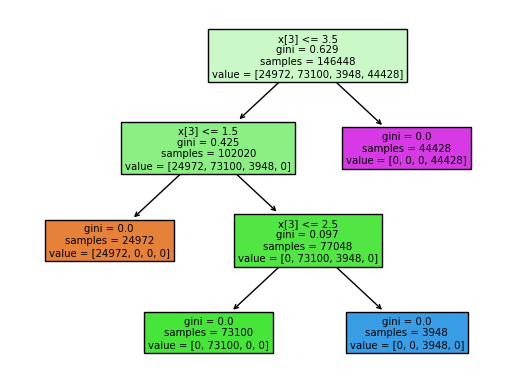

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf3 = DecisionTreeClassifier(max_depth=5)
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

print(classification_report(y_test, y_pred))

fig, ax = plt.subplots()
tree.plot_tree(clf3, filled=True, ax=ax)
plt.show()


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       230
           2       1.00      1.00      1.00       576
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00       385

    accuracy                           1.00      1221
   macro avg       1.00      1.00      1.00      1221
weighted avg       1.00      1.00      1.00      1221



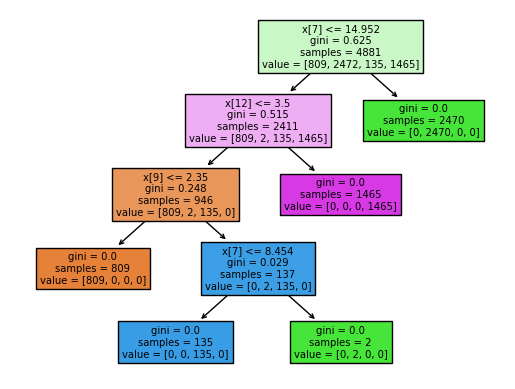

In [83]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_f, y_f, test_size=0.2, random_state =0)
clf4 = DecisionTreeClassifier(max_depth=6)
clf4.fit(X_train2, y_train2)

y_pred2 = clf4.predict(X_test2)

print(classification_report(y_test2, y_pred2))

fig, ax = plt.subplots()
tree.plot_tree(clf4, filled=True, ax=ax)
plt.show()

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(n_estimators=100, random_state = 0)

rf_class.fit(X_train, y_train)

y_rf = rf_class.predict(X_test)
print(classification_report(y_test, y_rf))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6162
           2       1.00      1.00      1.00     18162
           3       1.00      1.00      1.00      1043
           4       1.00      1.00      1.00     11245

    accuracy                           1.00     36612
   macro avg       1.00      1.00      1.00     36612
weighted avg       1.00      1.00      1.00     36612

[2 2 2 ... 4 2 2]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       230
           2       1.00      1.00      1.00       576
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00       385

    accuracy                           1.00      1221
   macro avg       1.00      1.00      1.00      1221
weighted avg       1.00      1.00      1.00      1221



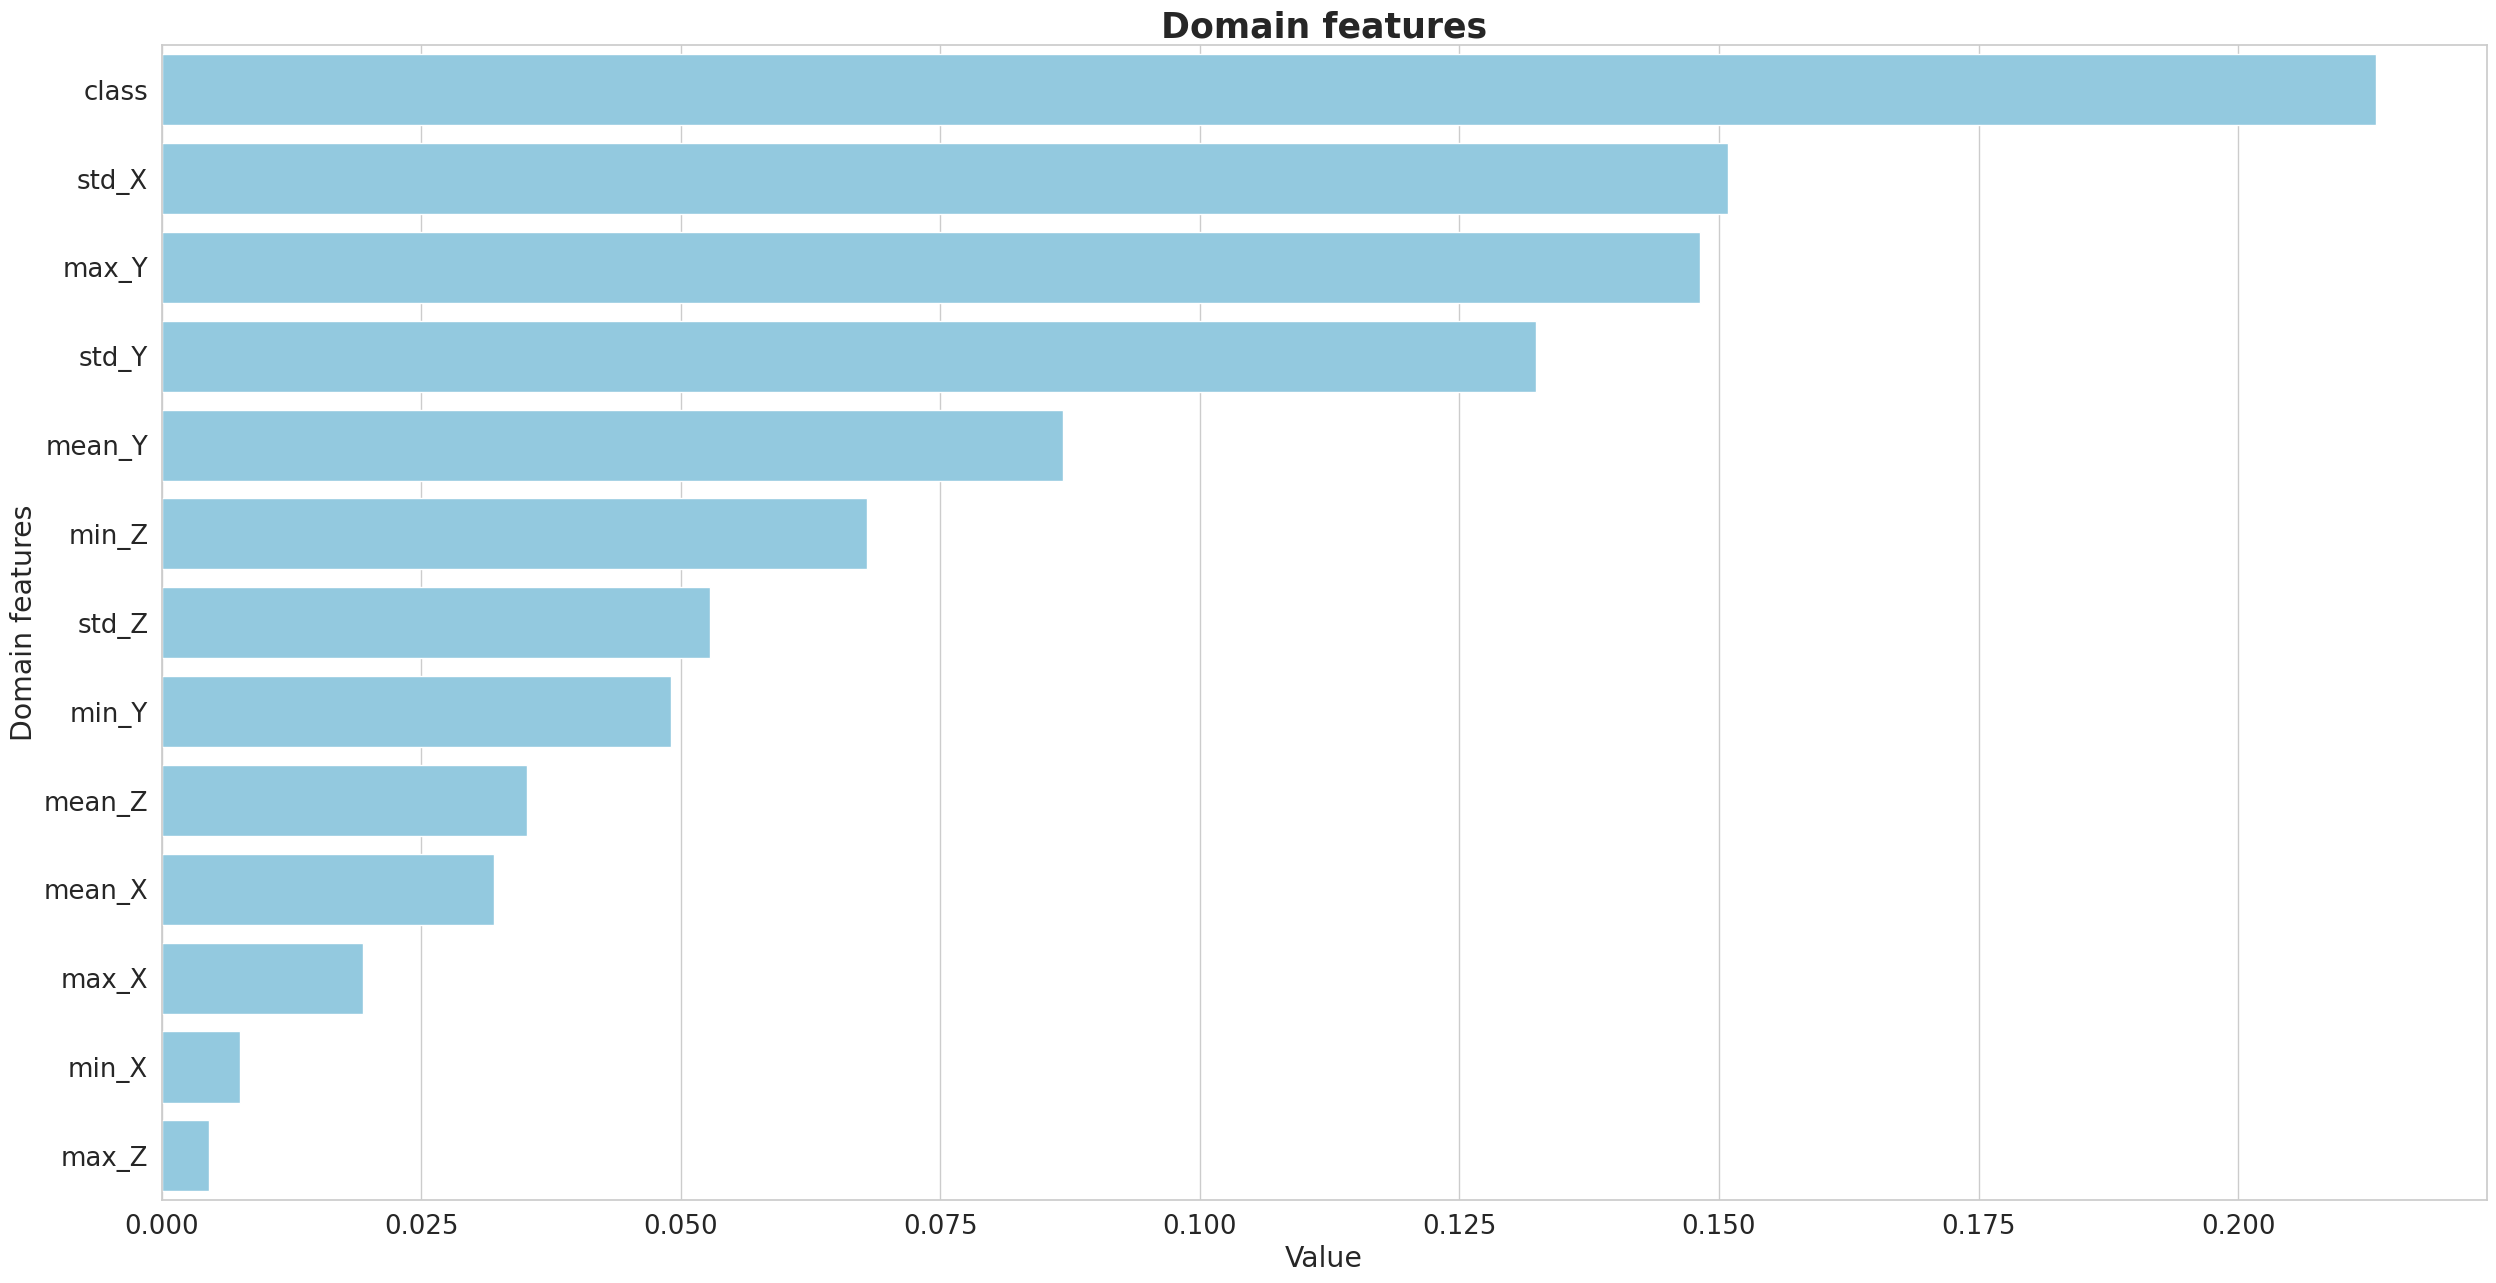

None

,Domain features,Value
0,class,0.213260
1,std_X,0.150838
2,max_Y,0.148140
3,std_Y,0.132390
4,mean_Y,0.086845
5,min_Z,0.067912
6,std_Z,0.052835
7,min_Y,0.049079
8,mean_Z,0.035190
9,mean_X,0.032024


In [87]:
import seaborn as sns
rf_class2 = RandomForestClassifier(n_estimators=100, random_state = 0)

rf_class2.fit(X_train2, y_train2)

y_rf2 = rf_class2.predict(X_test2)
print(classification_report(y_test2, y_rf2))


feats = {}
for feature, importance in zip(df_features.columns, rf_class2.feature_importances_):
     feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Value'})
importances = importances.sort_values(by='Value', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Domain features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Value'], y=importances['Domain features'], data=importances, color='skyblue')
plt.title('Domain features', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)